# Telecom Churn Case Study

In [187]:
#importing all necesary libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### Data Reading

In [188]:
#Reading all Datasets
test = pd.read_csv("test (1).csv")
train = pd.read_csv("train (1).csv")

In [189]:
#Setting max columns/rows display range
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [190]:
#Train dataset shape
train.shape

(69999, 172)

In [24]:
#Prints information about a Train DataFrame including the index dtype and columns, non-null values and memory usage.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [25]:
#Generate descriptive statistics of Train dataset
train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [26]:
# Checking detail information about train data.

def getDatasetDetail(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

getDatasetDetail(train)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.9,5506
count_rech_2g_6,float64,17568,52431,74.9,30
night_pck_user_6,float64,17568,52431,74.9,2
arpu_2g_6,float64,17568,52431,74.9,5389
date_of_last_rech_data_6,object,17568,52431,74.9,30
...,...,...,...,...,...
last_day_rch_amt_8,int64,69999,0,0.0,191
vol_2g_mb_6,float64,69999,0,0.0,11494
vol_2g_mb_7,float64,69999,0,0.0,11443
vol_2g_mb_8,float64,69999,0,0.0,11359


##### Above detail about dataset shows that some columns of dataset contains null values.

### Data Cleaning

In [27]:
#Droping all column which contain more than 60% null value
train = train.loc[: ,((train.isnull().sum()/len(train))*100)< 60 ]

In [28]:
#Recheck Null value percentage in each column in train dataset after droping above columns
getDatasetDetail(train)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
roam_og_mou_8,float64,66296,3703,5.29,5215
og_others_8,float64,66296,3703,5.29,179
spl_og_mou_8,float64,66296,3703,5.29,3848
loc_ic_t2t_mou_8,float64,66296,3703,5.29,11446
loc_og_t2m_mou_8,float64,66296,3703,5.29,17616
...,...,...,...,...,...
total_rech_amt_8,int64,69999,0,0.00,2149
max_rech_amt_6,int64,69999,0,0.00,190
max_rech_amt_7,int64,69999,0,0.00,178
max_rech_amt_8,int64,69999,0,0.00,202


In [29]:
#Shape of train dataset after removal of null value columns
train.shape

(69999, 142)

In [30]:
#Changing datatype of date variables to datetime.
columns=train.columns
col_with_date=[]
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
train[col_with_date].dtypes

date_of_last_rech_6    object
date_of_last_rech_7    object
date_of_last_rech_8    object
dtype: object

In [31]:
#Convert the above columns to datetime data type.
for col in col_with_date:
    train[col]=pd.to_datetime(train[col], format="%m/%d/%Y")
train[col_with_date]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-22,2014-07-10,2014-08-24
1,2014-06-12,2014-07-10,2014-08-26
2,2014-06-11,2014-07-22,2014-08-24
3,2014-06-15,2014-07-21,2014-08-25
4,2014-06-25,2014-07-26,2014-08-30
...,...,...,...
69994,2014-06-18,2014-07-31,2014-08-31
69995,2014-06-28,2014-07-31,2014-08-27
69996,2014-06-25,2014-07-30,2014-08-29
69997,2014-06-29,2014-07-19,2014-08-26


We have to find high value customer, whose , average recharge amount of june and july is more than 70th percentile of  average recharge amount 

In [32]:
#Calculate average recharge amount of june and july
train['average_rech_amt_6and7']=(train['total_rech_amt_6']+train['total_rech_amt_7'])/2

In [33]:
train.shape

(69999, 143)

In [34]:
#Droping column with single unique value 
metadata= getDatasetDetail(train)
single_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values
train.drop(columns=single_value_cols,inplace=True)

In [35]:
#Rechecking shape of dataset after above action
train.shape

(69999, 130)

In [36]:
train['recharge2_days']=(train['date_of_last_rech_8'] - train['date_of_last_rech_7']).dt.days
train['recharge1_days']=(train['date_of_last_rech_7'] - train['date_of_last_rech_6']).dt.days

In [37]:
#Dropping date column as it is not usefull in model creation 
date_columns = train.filter(regex='^date.*').columns
train.drop(columns=date_columns, inplace=True)
getDatasetDetail(train)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_8,float64,66296,3703,5.29,24182
og_others_8,float64,66296,3703,5.29,179
std_og_t2m_mou_8,float64,66296,3703,5.29,15968
std_og_t2t_mou_8,float64,66296,3703,5.29,14483
std_og_mou_8,float64,66296,3703,5.29,21745
...,...,...,...,...,...
last_day_rch_amt_6,int64,69999,0,0.00,179
last_day_rch_amt_7,int64,69999,0,0.00,166
last_day_rch_amt_8,int64,69999,0,0.00,191
vol_2g_mb_6,float64,69999,0,0.00,11494


In [38]:
#Imputing null value with median in train dataset
for column in train:
    train[column]=train[column].fillna(train[column].median())

In [39]:
#Rechecking dataset detail
getDatasetDetail(train)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,69999,0,0.0,69999
loc_ic_mou_7,float64,69999,0,0.0,24258
total_rech_amt_7,int64,69999,0,0.0,2147
total_rech_amt_6,int64,69999,0,0.0,2108
total_rech_num_8,int64,69999,0,0.0,92
...,...,...,...,...,...
std_og_t2f_mou_7,float64,69999,0,0.0,1991
std_og_t2f_mou_6,float64,69999,0,0.0,2074
std_og_t2m_mou_8,float64,69999,0,0.0,15968
std_og_t2m_mou_7,float64,69999,0,0.0,16234


In [40]:
train.shape

(69999, 129)

### Exploratory Data Analysis

In [41]:
train.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,average_rech_amt_6and7,recharge2_days,recharge1_days
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.521038,44.838857,43.890335,91.173739,88.855772,88.435599,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,140.781376,137.782090,136.405430,77.431415,80.560009,79.055781,84.823656,88.167203,85.96945,1.081836,1.042449,1.001784,163.645994,170.062063,166.410655,0.812319,0.779964,0.797125

In [42]:
# Converting churn column to int 
train['churn_probability'] = train['churn_probability'].astype('int64')

In [43]:
train.shape

(69999, 129)

In [44]:
#Get all numeric columns
numCol = train.select_dtypes(exclude=['object']).columns
print(numCol)

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'average_rech_amt_6and7',
       'recharge2_days', 'recharge1_days'],
      dtype='object', length=129)


In [45]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [46]:
#Get all numeric columns
numCol = train.select_dtypes(exclude=['object']).columns
#Cap all Outliers
for col in numCol: 
    arr = cap_outliers(train[col])
    train[col] = arr

In [47]:
#Correlated data with target variable churn_probability
train.corrwith(train['churn_probability']).sort_values(ascending=False)

churn_probability    1.000000
roam_og_mou_7        0.097701
roam_og_mou_8        0.097078
std_og_mou_6         0.096546
std_og_t2t_mou_6     0.079062
                       ...   
total_rech_num_8    -0.185770
arpu_8              -0.201386
max_rech_amt_8      -0.205459
total_rech_amt_8    -0.206507
total_ic_mou_8      -0.229373
Length: 129, dtype: float64

#### Handeling High Correalted data

In [48]:
def deleteHighCorrData(dataset, limit):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= limit) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [49]:
#delete highly correlated data
deleteHighCorrData(train,0.85)

In [50]:
train.shape

(69999, 113)

#### Deriving new columns

In [51]:
# Total mou at incoming and outgoing of good phase
train['total_mou_good'] = (train['total_og_mou_6'])

In [52]:
# Average mou at incoming and outgoing of good phase
train['avg_mou_action'] = ((train['total_og_mou_7'])+ 
                               (train['total_og_mou_8']))/2

In [53]:
# Difference between total_mou_good and avg_mou_action
train['diff_mou'] = train['avg_mou_action'] - train['total_mou_good']

In [54]:
# Checking if mou is decreased in action phase
train['decrease_mou_action'] = np.where((train['diff_mou'] < 0), 1, 0)

In [55]:
# Calculate Average recharge number at action phase
train['avg_rech_num_action'] = (train['total_rech_num_7'] + train['total_rech_num_8'])/2

In [56]:
# Calculate difference in  total_rech_num_6 and avg_rech_num_action
train['diff_rech_num'] = train['avg_rech_num_action'] - train['total_rech_num_6']

In [57]:
# Checking if diff_rech_num is decreased in action phase
train['decrease_rech_num_action'] = np.where((train['diff_rech_num'] < 0), 1, 0)

In [58]:
# Calculate average of average revenue per user(arpu) in action phase
train['avg_arpu_action'] = (train['arpu_7'] + train['arpu_8'])/2

In [59]:
# Calculate difference in  average arpu of good and action phase and  ARPU of june
train['diff_arpu'] = train['avg_arpu_action'] - train['arpu_6']

In [60]:
# Checking if diff_arpu is decreased in action phase
train['decrease_arpu_action'] = np.where(train['diff_arpu'] < 0, 1, 0)

In [61]:
# Calculate average of volume based cost in action phase
train['avg_vbc_3g_action'] = (train['jul_vbc_3g'] + train['aug_vbc_3g'])/2

In [62]:
# Calculate difference in  good and action phase VBC
train['diff_vbc'] = train['avg_vbc_3g_action'] - train['jun_vbc_3g']

In [63]:
# Checking if diff_vbc is decreased in action phase
train['decrease_vbc_action'] = np.where(train['diff_vbc'] < 0 , 1, 0)

#### Data Visualization

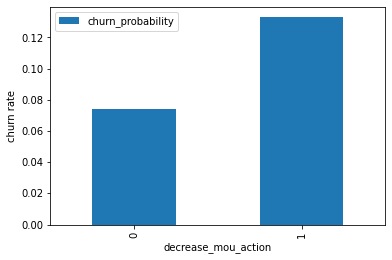

In [64]:
# Analysing mou in action phase with target variable churn_probability 
train.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Above plot shows that as mou decreases in action phase , churning rate of customer increases

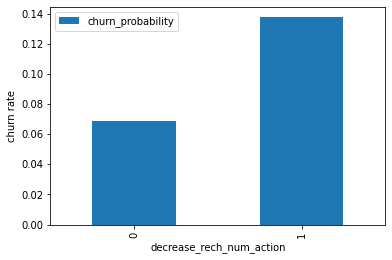

In [65]:
# Analysing number of recharge in action phase with target variable churn_probability 
train.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Above plot shows that , As the number of recharge by customer decreases in action phase , churning rate of customer increases

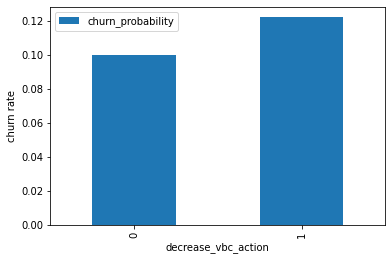

In [66]:
# Analysing Volume based cost in action phase with target variable churn_probability 
train.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Above plot shows that As the volume based cost in action phase is almost propotional to churn rate

[Text(0.5, 0, 'Action phase ARPU')]

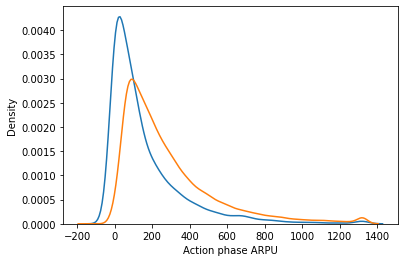

In [67]:
#Analyse ARPU in action phase column data with churn and non churn data
ax = sns.distplot(train[train['churn_probability'] == 1]['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(train[train['churn_probability'] == 0]['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

Above plot shows higher arpu less churn data

[Text(0.5, 0, 'Good phase MOU')]

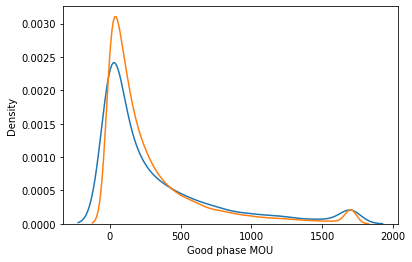

In [68]:
#Analyse total_mou_good in good phase column data with churn and non churn data
ax = sns.distplot(train[train['churn_probability'] == 1]['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(train[train['churn_probability'] == 0]['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Good phase MOU')

Above plot shows , As the Minutes Of Usage(MOU) of the churn customers in good phase is increased churn rate decreases.

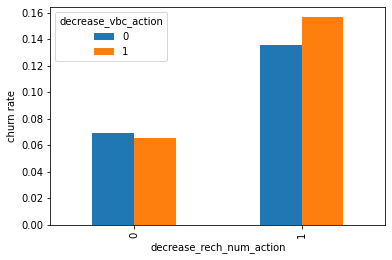

In [69]:
train.pivot_table(values='churn_probability', index='decrease_rech_num_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

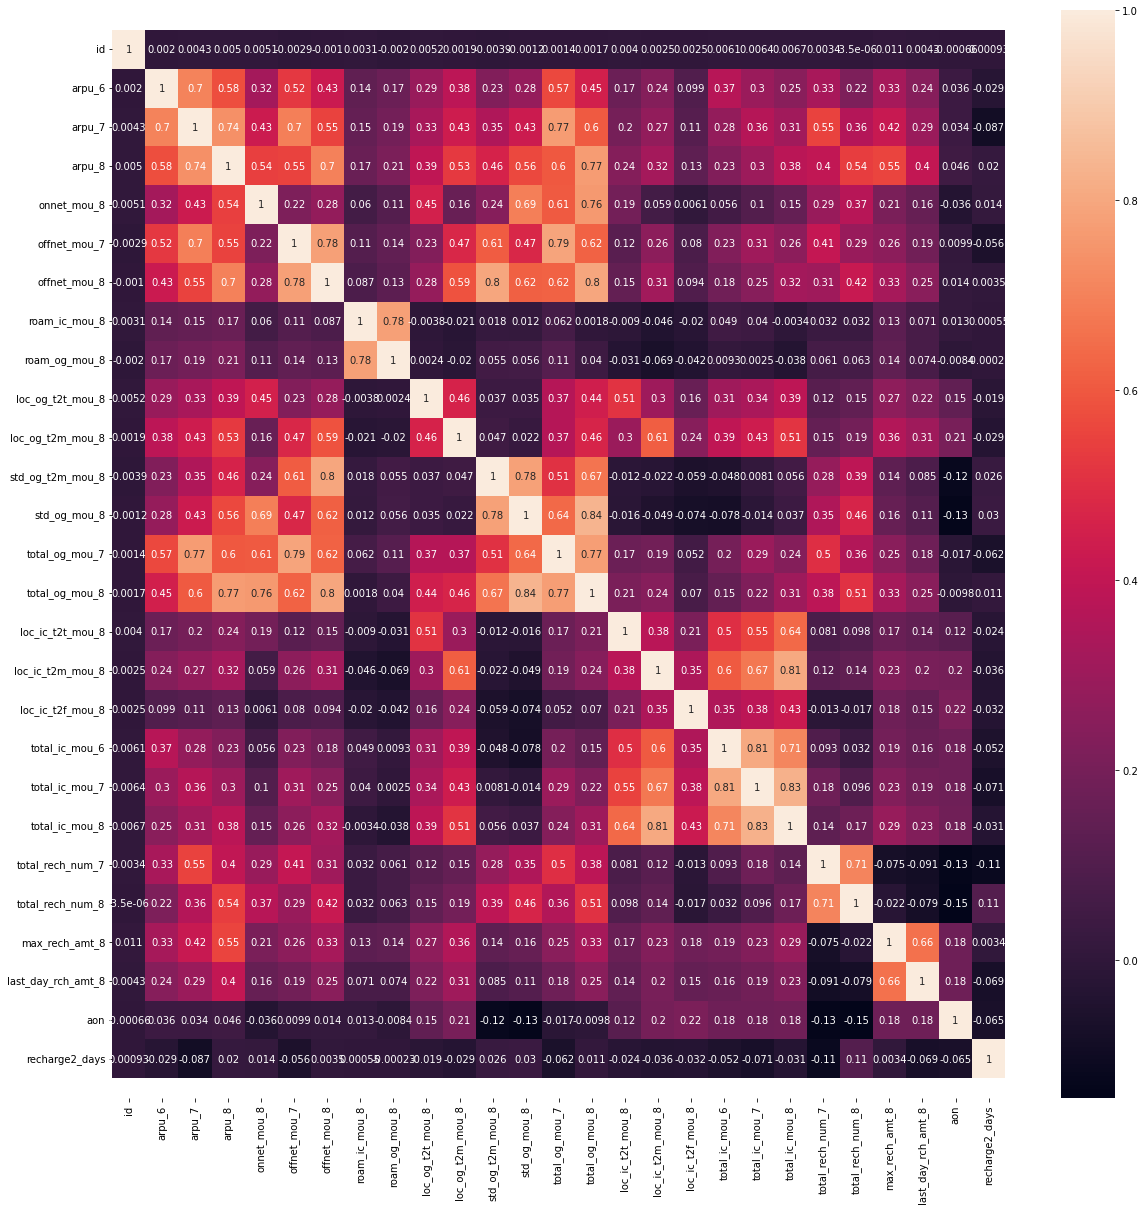

In [186]:
#Heatmap
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train.corr(), 
            xticklabels=train.corr().columns.values,
            yticklabels=train.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

Above plot shows , `total_ic_mou_8` is showing highest correlation with `total_ic_mou_7` and `loc_ic_t2m_mou_8`

In [71]:
# Dropping derived columns which are not needed for model building
train = train.drop(['total_mou_good','avg_mou_action','diff_mou','decrease_mou_action','avg_rech_num_action','diff_rech_num',
              'decrease_rech_num_action','avg_arpu_action','diff_arpu','decrease_arpu_action','avg_vbc_3g_action','diff_vbc',
              'decrease_vbc_action'], axis=1)

### Spliting dataset

In [73]:
X = train.drop("churn_probability",1)
y = train.churn_probability

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### Random Forest Feature Selection

In [75]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [76]:
featImp = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

rfcImp = pd.Series(featImp, index=X_train.columns)

In [78]:
featImp_df = pd.DataFrame(rfcImp)
featImp_df.reset_index(inplace=True)
featImp_df.columns=['features',"featImp"]
featImp_df

,features,featImp
0,id,0.011982
1,arpu_6,0.011155
2,arpu_7,0.013445
3,arpu_8,0.054134
4,onnet_mou_6,0.009452
...,...,...
107,aug_vbc_3g,0.002851
108,jul_vbc_3g,0.001944
109,jun_vbc_3g,0.001977
110,recharge2_days,0.014513


In [79]:
featImp_df = featImp_df[featImp_df['featImp']>0.01]
featColumns = list(featImp_df.features)
#featColumns.append('churn_probability')
featColumns

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_7',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon',
 'recharge2_days']

In [80]:
train = train[featColumns].dropna()

In [81]:
train.shape

(69999, 27)

In [82]:
X=train

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

#### Scaling dataset

In [83]:
#Scaling and transform train Dataset
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df

,id,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,std_og_t2m_mou_8,std_og_mou_8,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_7,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,aon,recharge2_days
0,1.232226,-0.969637,0.704748,-1.005697,-0.543322,-0.200835,-0.753673,-0.220094,-0.240309,-0.504329,-0.729143,-0.426036,-0.496678,-0.268029,-0.750599,-0.571230,-0.819334,-0.432732,-0.847176,-0.573551,-0.846063,-1.082776,-0.811753,-1.075011,-0.763978,-0.463439,-0.123613
1,-0.109663,-0.445272,-0.350314,-0.719429,0.366317,-0.145074,-0.169662,-0.220094,-0.240309,1.934209,0.494098,-0.426036,-0.472346,0.092683,0.143415,0.895943,1.513814,-0.432732,3.953014,1.546029,0.908511,-0.416698,-0.488198,0.280442,0.918728,0.108341,0.452328
2,-1.434956,0.129724,0.746423,0.528427,-0.502619,0.145505,-0.597976,0.375542,-0.240309,-0.462851,-0.503098,-0.367424,-0.444959,-0.096255,-0.627796,-0.164013,-0.152956,-0.432732,0.070331,0.758389,0.225243,0.249379,-0.164643,0.989448,1.798912,0.340627,0.740299
3,0.628753,-0.459495,-0.794608,-0.017013,-0.305079,-0.582795,0.257219,-0.220094,-0.240309,0.159987,1.365507,-0.419645,-0.492994,-0.617203,0.007754,-0.093255,3.263448,0.046238,0.326612,-0.574925,1.580331,-0.916256,0.158913,-0.553683,-0.375661,-0.380405,1.172254
4,-0.151076,-0.178397,-0.182049,-0.334501,-0.451105,-0.107790,-0.319416,-0.220094,-0.240309,-0.247191,-0.363796,-0.072577,-0.292889,-0.324426,-0.430956,-0.053897,0.043917,-0.427729,0.490663,1.426354,1.520068,1.581534,0.320690,-0.647522,-0.634539,-0.154426,0.020373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55994,-1.023988,-0.720477,-0.858041,0.329560,-0.543322,-0.646920,0.257093,-0.220094,-0.240309,-0.504329,-0.614663,0.868504,0.249696,-0.691281,-0.116487,-0.497203,-0.593959,-0.432732,-0.847176,-0.791449,-0.459649,-0.916256,0.644246,-0.032355,0.530411,-1.035220,-0.123613
55995,1.408829,1.558200,1.649853,3.560012,-0.306131,0.817337,3.212426,3.608164,6.888909,0.157053,2.437875,1.519805,0.643133,0.350202,1.254340,-0.259211,2.402924,-0.171641,1.395070,1.462877,1.517048,-0.250179,0.320690,2.563859,2.471994,0.561351,0.308343
55996,1.520042,-0.393675,-0.317704,-0.447534,-0.413654,-0.296918,-0.473342,-0.220094,-0.240309,-0.142763,-0.157979,-0.426036,-0.496678,-0.270610,-0.505908,-0.485837,-0.527040,-0.405441,-0.566850,-0.186646,-0.640168,-0.416698,-0.973531,0.488973,1.177605,0.967063,0.452328
55997,1.048093,0.377898,0.139257,0.042601,-0.470716,-0.240783,-0.394862,-0.220094,-0.240309,-0.334815,-0.440204,-0.151629,-0.330268,-0.457483,-0.488450,-0.480579,-0.691858,-0.271256,-0.698961,-0.723145,-0.697681,-0.583218,-0.811753,1.552482,2.497882,0.168252,-1.563465


In [84]:
#Transform test dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_df

,id,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,std_og_t2m_mou_8,std_og_mou_8,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_7,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,aon,recharge2_days
0,-1.560733,-0.913711,1.106348,-1.024845,-0.543322,2.681364,-0.747097,-0.220094,-0.240309,-0.504329,-0.729143,-0.426036,-0.496678,2.722072,-0.746522,-0.571230,-0.807768,-0.432732,-0.847176,-0.469833,-0.829521,1.914573,-0.811753,-1.075011,-0.763978,-0.391967,-0.699553
1,-0.092324,1.892949,1.130339,-0.080464,-0.420733,0.923449,-0.343230,3.163254,4.188208,-0.504329,-0.729143,-0.426036,-0.496678,0.532171,-0.750599,-0.571230,-0.819334,-0.432732,1.674185,-0.211866,-0.846334,0.249379,-0.002865,-0.553683,-0.763978,-0.398273,0.308343
2,0.866387,-0.040351,-0.822610,-1.003764,-0.543322,-0.746748,-0.749963,0.016900,-0.208628,-0.504329,-0.729143,-0.426036,-0.496678,-0.757125,-0.750599,-0.571230,-0.819334,-0.432732,-0.766474,-0.846544,-0.846334,-1.082776,-0.811753,-1.075011,-0.763978,-0.461337,2.612107
3,-1.471812,-0.928345,-0.856307,-0.697973,-0.543322,-0.749786,-0.753673,-0.220094,-0.240309,-0.504329,-0.729143,-0.426036,-0.496678,-0.725403,-0.750599,-0.565831,-0.738040,-0.298548,-0.728119,-0.822564,-0.786927,-0.250179,-0.973531,-0.053208,0.504523,2.125338,-0.987524
4,-0.048186,-0.786019,-0.592558,-0.801841,-0.450722,-0.026770,-0.617406,-0.046589,-0.004860,-0.467785,-0.706088,-0.288372,-0.364625,-0.230034,-0.632631,-0.410958,-0.801489,-0.432732,-0.719416,-0.629400,-0.733920,0.082860,-0.649976,-1.075011,-0.763978,0.807300,-0.699553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,-0.409368,0.697055,1.879074,1.713627,-0.440056,-0.010417,-0.535933,0.954700,0.002340,-0.216383,-0.462022,-0.426036,-0.490205,-0.196041,-0.576783,-0.468360,-0.329754,1.521357,1.779021,1.780459,1.173813,-0.583218,-0.488198,3.937356,2.471994,-0.483410,2.036166
13996,-0.589984,0.215321,-0.372020,-0.878613,0.266734,-0.632439,-0.548662,-0.220094,-0.240309,1.741356,-0.385172,-0.426036,-0.493425,-0.193382,-0.150748,0.248460,0.006327,-0.314013,0.008201,-0.147508,-0.104470,-0.250179,-0.326420,-0.553683,-0.763978,0.650691,0.884284
13997,-1.714450,-0.631407,-0.803453,0.008563,2.159385,-0.630649,-0.006252,-0.220094,-0.240309,-0.460450,-0.729143,0.586785,1.952111,-0.614054,1.200504,-0.526047,-0.807272,-0.432732,-0.787827,-0.823451,-0.661037,0.249379,0.320690,0.280442,0.918728,-1.058343,-0.123613
13998,1.194775,-0.333835,0.181321,-0.464563,-0.175554,-0.650665,-0.588914,-0.220094,-0.240309,-0.305207,-0.547353,-0.319463,-0.229519,0.030194,-0.447472,0.301032,0.300356,-0.432732,0.753000,0.448120,0.152314,1.581534,-0.002865,-0.553683,-0.763978,-0.710440,-0.987524


### Model Building

In [85]:
# Logistic regression model
testScaledColumns = list(X_test_scaled_df.columns)
testScaledColumns = ["const"]+testScaledColumns
lgm_1 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
lgm_1.fit().summary(xname=testScaledColumns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55971
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11937.
Date:                Wed, 13 Jul 2022   Deviance:                       23875.
Time:                        19:06:41   Pearson chi2:                 2.36e+11
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2092
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9568      0.043    -92.199      0.000      -4.041      -3.873
id                     0.0003      0.017      0.020      0.984      -0.033       0.033
arpu_6                 0.2300      0.024      9.518      0.000       0.183       0.277
arpu_7                 0.1278      0.041      3.119      0.002       0.047       0.208
arpu_8                -0.1763      0.064     -2.755      0.006      -0.302      -0.051
onnet_mou_8            0.1307      0.096      1.354      0.176      -0.058       0.320
offnet_mou_7           0.0689      0.040      1.737      0.082      -0.009       0.147
offnet_mou_8           1.1490      0.109     10.510      0.000       0.935       1.363
roam_ic_mou_8          0.0335      0.021      1.632      0.103      -0.007       0.074
roam_og_mou_8          0.1831      0.024      7.723      0.000       0.137       0.230
loc_og_t2t_mou_8       0.9766      0.082     11.905      0.000       0.816       1.137
loc_og_t2m_mou_8       1.5172      0.111     13.676      0.000       1.300       1.735
std_og_t2m_mou_8      -0.8404      0.116     -7.245      0.000      -1.068      -0.613
std_og_mou_8           6.1438      0.271     22.689      0.000       5.613       6.675
total_og_mou_7         0.0572      0.045      1.282      0.200      -0.030       0.145
total_og_mou_8        -7.8030      0.302    -25.821      0.000      -8.395      -7.211
loc_ic_t2t_mou_8       0.3023      0.066      4.581      0.000       0.173       0.432
loc_ic_t2m_mou_8       0.2959      0.089      3.316      0.001       0.121       0.471
loc_ic_t2f_mou_8      -0.2966      0.061     -4.830      0.000      -0.417      -0.176
total_ic_mou_6         0.0811      0.034      2.397      0.017       0.015       0.147
total_ic_mou_7         0.1841      0.045      4.061      0.000       0.095       0.273
total_ic_mou_8        -1.9221      0.131    -14.621      0.000      -2.180      -1.664
total_rech_num_7       0.0022      0.030      0.072      0.942      -0.057       0.062
total_rech_num_8      -0.6219      0.042    -14.795      0.000      -0.704      -0.540
max_rech_amt_8        -0.2638      0.033     -8.077      0.000      -0.328      -0.200
last_day_rch_amt_8    -0.5868      0.034    -17.014      0.000      -0.654      -0.519
aon                   -0.3109      0.022    -13.996      0.000      -0.354      -0.267
recharge2_days        -0.1546      0.016     -9.570      0.000      -0.186      -0.123
======================================================================================
"""

### Recursive Feature Elimination (RFE) for Feature Selection

In [86]:
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=15)             
rfe = rfe.fit(X_train_scaled, y_train)
rfe.support_

array([False,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False])

In [87]:
list(zip(X_train_scaled_df.columns, rfe.support_, rfe.ranking_))

[('id', False, 13),
 ('arpu_6', True, 1),
 ('arpu_7', False, 4),
 ('arpu_8', False, 5),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_7', False, 8),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 11),
 ('roam_og_mou_8', False, 6),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('total_og_mou_7', False, 10),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 2),
 ('loc_ic_t2m_mou_8', False, 3),
 ('loc_ic_t2f_mou_8', True, 1),
 ('total_ic_mou_6', False, 9),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_num_7', False, 12),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('aon', True, 1),
 ('recharge2_days', False, 7)]

In [88]:
col = list(X_train_scaled_df.columns[rfe.support_])

In [89]:
X_train_rfe = scaler.fit_transform(X_train[col])
features = ['const']+list(col)
features

['const',
 'arpu_6',
 'onnet_mou_8',
 'offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2m_mou_8',
 'std_og_mou_8',
 'total_og_mou_8',
 'loc_ic_t2f_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon']

#### Logistic regression model with RFE

In [90]:
# Logistic regression model with RFE
X_train_sm = sm.add_constant(X_train_rfe)
lgm_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lgm_2.fit()
res.summary(xname=features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55983
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12090.
Date:                Wed, 13 Jul 2022   Deviance:                       24181.
Time:                        19:06:46   Pearson chi2:                 1.31e+11
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2049
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8848      0.042    -93.551      0.000      -3.966      -3.803
arpu_6                 0.3308      0.020     16.891      0.000       0.292       0.369
onnet_mou_8            0.6071      0.091      6.699      0.000       0.429       0.785
offnet_mou_8           1.8712      0.090     20.875      0.000       1.696       2.047
loc_og_t2t_mou_8       0.8892      0.074     12.028      0.000       0.744       1.034
loc_og_t2m_mou_8       1.1655      0.096     12.167      0.000       0.978       1.353
std_og_t2m_mou_8      -0.9465      0.120     -7.857      0.000      -1.183      -0.710
std_og_mou_8           5.4587      0.235     23.196      0.000       4.997       5.920
total_og_mou_8        -7.7832      0.252    -30.889      0.000      -8.277      -7.289
loc_ic_t2f_mou_8      -0.3558      0.061     -5.837      0.000      -0.475      -0.236
total_ic_mou_7         0.3816      0.035     10.861      0.000       0.313       0.450
total_ic_mou_8        -1.5853      0.075    -21.262      0.000      -1.731      -1.439
total_rech_num_8      -0.6706      0.032    -20.702      0.000      -0.734      -0.607
max_rech_amt_8        -0.2958      0.028    -10.723      0.000      -0.350      -0.242
last_day_rch_amt_8    -0.5773      0.034    -16.902      0.000      -0.644      -0.510
aon                   -0.2930      0.022    -13.401      0.000      -0.336      -0.250
======================================================================================
"""

In [91]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([2.70060892e-01, 2.15705200e-03, 9.07526700e-03, 1.20893595e-03,
       6.96159116e-03, 4.24994677e-05, 7.95953838e-01, 2.89471419e-02,
       1.50173519e-02, 1.74129961e-02])

In [92]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [93]:
y_train_pred_final

,Churn,Churn_Prob,predicted
0,1,0.270061,1
1,0,0.002157,0
2,0,0.009075,0
3,0,0.001209,0
4,0,0.006962,0
...,...,...,...
55994,0,0.028366,0
55995,0,0.001353,0
55996,0,0.039150,0
55997,0,0.019220,0


In [94]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import plot_roc_curve

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[39671 10588]
 [  933  4807]]


In [95]:
print("Train Data Accuracy:",metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

Train Data Accuracy: 0.7942641832889873


In [96]:
vif = pd.DataFrame()
X_train_vif = pd.DataFrame(X_train_rfe,columns=col)
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train_vif[col].values, i) for i in range(X_train_vif[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_8,34.28
7,total_og_mou_8,32.40
2,offnet_mou_8,21.87
5,std_og_t2m_mou_8,21.06
1,onnet_mou_8,12.47
4,loc_og_t2m_mou_8,6.87
3,loc_og_t2t_mou_8,4.92
10,total_ic_mou_8,3.91
9,total_ic_mou_7,3.39
12,max_rech_amt_8,1.98


### Model Effeciency Metrics

In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
print("Senstivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("False Positive Rate: ",FP/ float(TN+FP))
print("Positive Predictive Value:",TP / float(TP+FP))
print ("Negative Predictive Value:",TN / float(TN+ FN))

Senstivity:  0.8374564459930314
Specificity:  0.7893312640522095
False Positive Rate:  0.21066873594779045
Positive Predictive Value: 0.31224423514127964
Negative Predictive Value: 0.9770219682789872


### ROC Curve

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

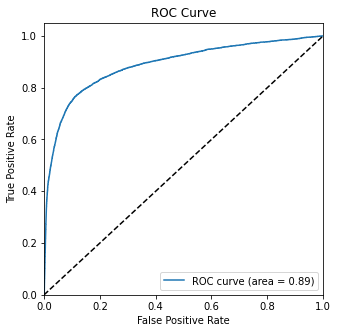

In [101]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [102]:
n = [float(x)/10 for x in range(10)]
for i in n:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.270061,1,1,1,1,0,0,0,0,0,0,0
1,0,0.002157,0,1,0,0,0,0,0,0,0,0,0
2,0,0.009075,0,1,0,0,0,0,0,0,0,0,0
3,0,0.001209,0,1,0,0,0,0,0,0,0,0,0
4,0,0.006962,0,1,0,0,0,0,0,0,0,0,0


In [103]:
metrics_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    metrics_df.loc[i] =[ i ,accuracy,sensi,speci]
print(metrics_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.102502     1.000000     0.000000
0.1          0.1  0.794264     0.837456     0.789331
0.2          0.2  0.899945     0.713415     0.921248
0.3          0.3  0.923356     0.570383     0.963668
0.4          0.4  0.927749     0.462021     0.980939
0.5          0.5  0.928659     0.420732     0.986669
0.6          0.6  0.926338     0.369164     0.989972
0.7          0.7  0.915302     0.218815     0.994847
0.8          0.8  0.901945     0.057491     0.998388
0.9          0.9  0.898105     0.012892     0.999204


In [104]:
num = [0.1]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print(sensi)
    metrics_df.loc[i] =[ i ,accuracy,sensi,speci]
print(metrics_df)

0.8374564459930314
     probability  accuracy  sensitivity  specificity
0.0          0.0  0.102502     1.000000     0.000000
0.1          0.1  0.794264     0.837456     0.789331
0.2          0.2  0.899945     0.713415     0.921248
0.3          0.3  0.923356     0.570383     0.963668
0.4          0.4  0.927749     0.462021     0.980939
0.5          0.5  0.928659     0.420732     0.986669
0.6          0.6  0.926338     0.369164     0.989972
0.7          0.7  0.915302     0.218815     0.994847
0.8          0.8  0.901945     0.057491     0.998388
0.9          0.9  0.898105     0.012892     0.999204


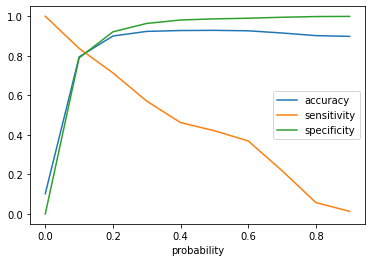

In [105]:
metrics_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [106]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Probability':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Probability.map(lambda x: 1 if x > 0.1 else 0)

In [107]:
print("Precision: ",precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print("Recall: ",recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print("F1 Score: ",f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted))


Precision:  0.31224423514127964
Recall:  0.8374564459930314
F1 Score:  0.45488526141471497


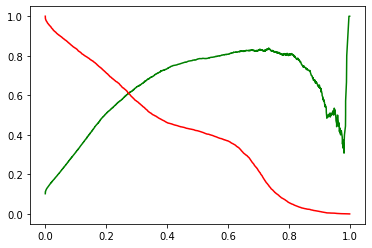

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Test Data Pridictions

In [109]:
X_test_scaled = scaler.transform(X_test[col])
X_test_sm = sm.add_constant(X_test_scaled)
y_test_pred = res.predict(X_test_sm) 

In [110]:
y_pred_final = pd.DataFrame({"Churn_Probability":y_test_pred, "Churn":y_test})
y_pred_final

,Churn_Probability,Churn
3425,0.268385,1
33067,0.554198,1
52420,0.313380,0
5220,0.052067,0
33958,0.172137,1
...,...,...
26667,0.000686,0
23021,0.021006,0
322,0.050814,0
59049,0.064014,0


In [111]:
y_pred_final['final_churn_prediction'] = y_pred_final.Churn_Probability.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final

,Churn_Probability,Churn,final_churn_prediction
3425,0.268385,1,1
33067,0.554198,1,1
52420,0.313380,0,1
5220,0.052067,0,0
33958,0.172137,1,1
...,...,...,...
26667,0.000686,0,0
23021,0.021006,0,0
322,0.050814,0,0
59049,0.064014,0,0


In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_churn_prediction )
confusion2

array([[10005,  2603],
       [  235,  1157]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
print("Senstivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("Test Accuracy:",metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_churn_prediction))

Senstivity:  0.8311781609195402
Specificity:  0.7935437817258884
Test Accuracy: 0.7972857142857143


### Principal component analysis (PCA).

In [115]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.23222599, -0.96963677,  0.70474826, ..., -0.76397774,
        -0.46343931, -0.1236126 ],
       [-0.10966252, -0.44527173, -0.35031404, ...,  0.91872754,
         0.10834101,  0.4523283 ],
       [-1.43495577,  0.12972408,  0.74642274, ...,  1.79891184,
         0.34062676,  0.74029875],
       ...,
       [ 1.52004245, -0.39367476, -0.31770415, ...,  1.17760528,
         0.96706255,  0.4523283 ],
       [ 1.04809281,  0.3778985 ,  0.13925723, ...,  2.49788173,
         0.16825181, -1.56346484],
       [ 0.1722589 ,  0.99260008,  2.52006954, ...,  3.76638263,
         2.4606284 , -0.98752394]])

In [116]:
# Initililizing PCA 
pca = PCA(random_state=42)
#Fit train scale data
pca.fit(X_train_scaled)
#Principle components
pca.components_


array([[ 1.50747400e-03,  2.26788177e-01,  2.81347874e-01,
         2.97239780e-01,  2.00141224e-01,  2.64147689e-01,
         2.79762786e-01,  4.09952321e-02,  5.12445225e-02,
         1.77818611e-01,  2.20179851e-01,  1.90314238e-01,
         2.10504545e-01,  2.80923872e-01,  2.99397374e-01,
         1.36198677e-01,  1.73989837e-01,  7.83894582e-02,
         1.56504793e-01,  1.86950772e-01,  2.01097503e-01,
         1.70191640e-01,  1.74019766e-01,  1.65536370e-01,
         1.29934247e-01,  2.97672135e-02, -1.39189435e-02],
       [ 3.60106078e-03, -4.15242215e-03, -5.73971616e-02,
        -6.71491746e-02, -1.47494279e-01, -1.00583206e-01,
        -1.16760830e-01, -3.86546227e-02, -7.25962579e-02,
         1.43055202e-01,  1.85433127e-01, -2.70340027e-01,
        -3.12607301e-01, -1.42904671e-01, -1.63791349e-01,
         2.60673824e-01,  3.17451159e-01,  2.35604743e-01,
         3.36476253e-01,  3.31387387e-01,  3.37585578e-01,
        -1.46111736e-01, -1.72118825e-01,  9.19660327e-

In [117]:
#Variance Ratio
pca.explained_variance_ratio_

array([0.30701646, 0.14497782, 0.07400486, 0.06237811, 0.05055885,
       0.04399879, 0.03793084, 0.03704089, 0.03415541, 0.0333277 ,
       0.0313079 , 0.02596656, 0.02346428, 0.01728808, 0.0138548 ,
       0.01248936, 0.01061863, 0.00805156, 0.00740855, 0.0063565 ,
       0.00561313, 0.00346291, 0.00325059, 0.00284853, 0.00122998,
       0.00095394, 0.00044499])

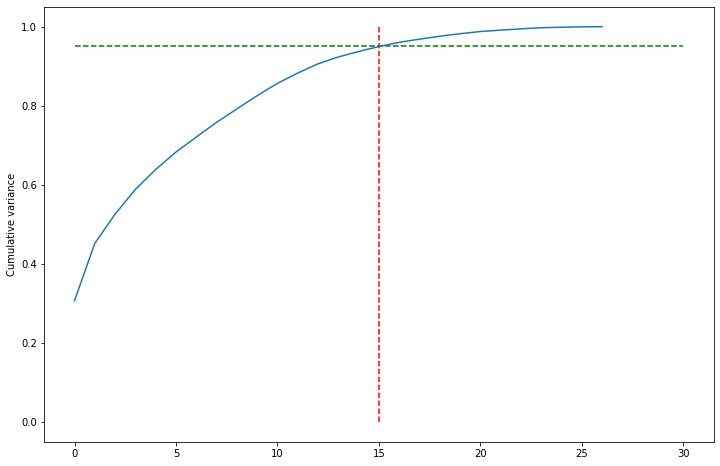

In [118]:
#Cummulative Variance
cumVar = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(cumVar)
plt.ylabel("Cumulative variance")
plt.show()

In [119]:
#Instantiate PCA with 15 components
pca_final = IncrementalPCA(n_components=15)
X_train_scaled.shape

(55999, 27)

In [120]:
#Fit and transform train and test data
train_pca_df = pca_final.fit_transform(X_train_scaled)
test_pca_df = pca_final.transform(X_test_scaled)

<AxesSubplot:>

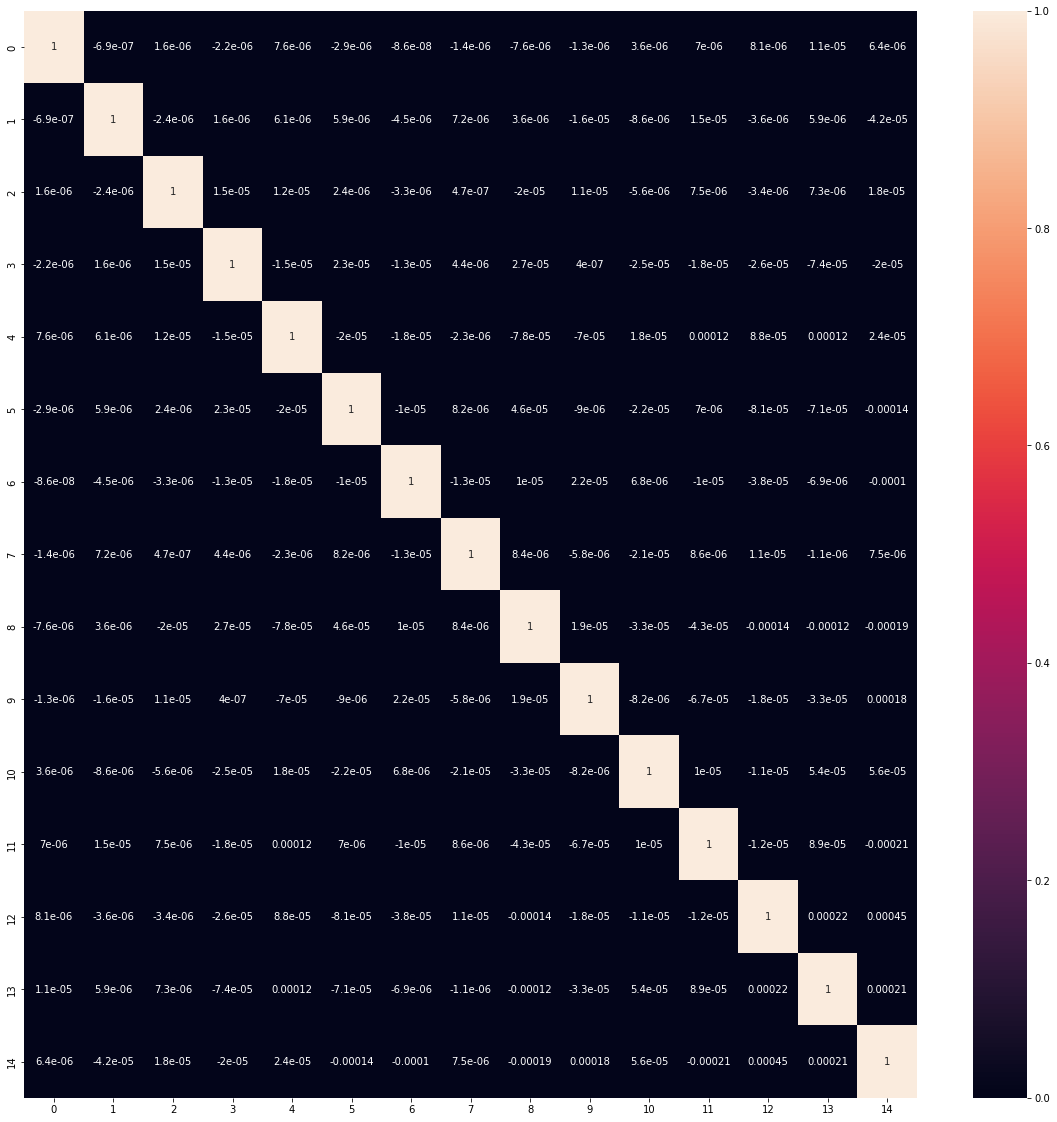

In [121]:
corrMatrics = np.corrcoef(train_pca_df.transpose())
plt.figure(figsize=[20,20])
sns.heatmap(corrMatrics, annot=True)

### Gradient Boosting Machine(GBM) Model

In [122]:
gbm = GradientBoostingClassifier(random_state=100)
gbm.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [123]:
gbm.fit(train_pca_df, y_train)
gbm_pred = gbm.predict(test_pca_df)

In [124]:
print("GBM Test Accuracy : ",accuracy_score(y_test, gbm_pred))
print("GBM Recall Score : ",recall_score(y_test,gbm_pred))

GBM Test Accuracy :  0.9205714285714286
GBM Recall Score :  0.3800287356321839


In [125]:
gbm_pred = gbm.predict(train_pca_df)
print("GBM Train Accuracy : ",accuracy_score(y_train, gbm_pred))

GBM Train Accuracy :  0.9219807496562439


### AdaBoost

In [126]:
from sklearn.ensemble import AdaBoostClassifier
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
adaboost.fit(train_pca_df, y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [127]:
y_pred = adaboost.predict(train_pca_df)
print('Train Data Accuracy :  ',accuracy_score(y_train, y_pred))

Train Data Accuracy :   0.9122305755459919


In [128]:
y_pred = adaboost.predict(test_pca_df)
print('Test Data Accuracy:  ',accuracy_score(y_test, y_pred))
print('Recall Score :  ',recall_score(y_test,y_pred))

Test Data Accuracy:   0.9118571428571428
Recall Score :   0.34051724137931033


### Logistic Regression on PCA

In [129]:
X_train_sm = sm.add_constant(train_pca_df)
X_train_sm

array([[ 1.        , -2.72758649, -0.75744134, ..., -0.01638372,
        -0.55953605, -0.55246252],
       [ 1.        ,  1.34251678,  3.69863377, ..., -0.70142235,
        -0.39586474,  2.35145641],
       [ 1.        ,  0.12269264,  0.70196413, ...,  0.4398992 ,
        -0.90449741,  0.2561837 ],
       ...,
       [ 1.        , -1.5235303 ,  0.26743974, ...,  0.18342137,
        -0.7083598 ,  0.35147625],
       [ 1.        , -0.90425662, -0.09337942, ...,  0.50255706,
         0.09703315,  0.33274858],
       [ 1.        ,  6.22456667,  3.93866183, ...,  0.82659853,
        -0.94771147,  0.61156461]])

In [130]:
y_train = pd.DataFrame(y_train)
lrm_pca = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lrm_pca.fit()

X_test_sm = sm.add_constant(test_pca_df)

In [131]:
y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Probability':y_test_pred})
y_test_pred_final['final_churn_prediction'] = y_test_pred_final.Churn_Probability.map(lambda x: 1 if x > 0.1 else 0)

In [132]:
print("Test Data Accuracy:",metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_churn_prediction))
print("Recall Score :",recall_score(y_test_pred_final.Churn, y_test_pred_final.final_churn_prediction))


Test Data Accuracy: 0.7662857142857142
Recall Score : 0.8354885057471264


### SVM model

In [133]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(train_pca_df, y_train)

SVC()

In [134]:
predictions = svm_model.predict(test_pca_df)

In [135]:
print("Test Data Accuracy:",metrics.accuracy_score(y_true=y_test, y_pred=predictions))
print("Recall Score :",recall_score(y_true=y_test, y_pred=predictions))


Test Data Accuracy: 0.9257857142857143
Recall Score : 0.3857758620689655


In [136]:
predictions = svm_model.predict(train_pca_df)

In [137]:
print("Train Data Accuracy:",metrics.accuracy_score(y_true=y_train, y_pred=predictions))

Train Data Accuracy: 0.9229629100519652


### XGBoost

In [138]:
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [139]:
xgbClassifier = xgb.XGBClassifier(n_jobs = 12,objective = 'binary:logistic')
xgbClassifier.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': 12,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [140]:
xgbClassifier.fit(train_pca_df, y_train)  

xgb_pred = xgbClassifier.predict(test_pca_df)

In [141]:
print("Test Data Accuracy:",metrics.accuracy_score(y_true=y_test, y_pred=xgb_pred))
print("Recall Score :",recall_score(y_true=y_test, y_pred=xgb_pred))

Test Data Accuracy: 0.926
Recall Score : 0.47772988505747127


### Random Forest Classifier Without PCA

In [142]:
randfor = RandomForestClassifier(random_state=42, n_jobs=12)

In [143]:
params = {
    'max_depth': [40,50,60],
    'min_samples_split':[5],
    'min_samples_leaf': [3],
    'n_estimators': [95,100,110]
}

In [144]:
grid_search = GridSearchCV(estimator=randfor,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(train,y)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=12, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60], 'min_samples_leaf': [3],
                         'min_samples_split': [5],
                         'n_estimators': [95, 100, 110]},
             scoring='accuracy', verbose=1)

In [145]:
grid_search.best_score_

0.9412277575045104

In [146]:
alpha = grid_search.best_estimator_
alpha

RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=110, n_jobs=12, random_state=42)

In [147]:
randfor = RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=110, n_jobs=12, random_state=42,oob_score = True)

In [148]:
randfor.fit(train,y)


RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=110, n_jobs=12, oob_score=True,
                       random_state=42)

In [149]:
randfor.oob_score_

0.9406420091715596

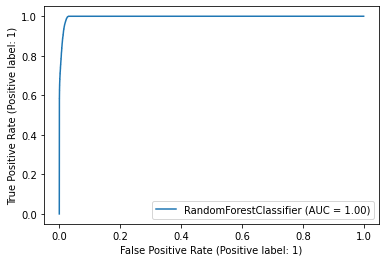

In [150]:
plot_roc_curve(randfor, train,y)
plt.show()

In [151]:
pred = randfor.predict(train)

print("Accuracy : ",metrics.accuracy_score(y_true=y, y_pred=pred))
print("Precision : ",precision_score(y, pred))
print("Recall Score : ",recall_score(y, pred))


Accuracy :  0.9740282004028629
Precision :  0.9317517062073448
Recall Score :  0.8039820527201346


In [152]:
rfc_prediction_test = randfor.predict(X_test)

In [153]:
print("Accuracy : ",metrics.accuracy_score(y_true=y_test, y_pred=rfc_prediction_test))
print("Precision : ",precision_score(y_test, rfc_prediction_test))
print("Recall Score : ",recall_score(y_test, rfc_prediction_test))

Accuracy :  0.9756428571428571
Precision :  0.9457167090754877
Recall Score :  0.8010057471264368


### Random Forest Classifier With PCA

In [154]:
randfor_pca = RandomForestClassifier(random_state=42, n_jobs=12)

In [155]:
params = {
    'max_depth': [40,50,60],
    'min_samples_split':[5],
    'min_samples_leaf': [3],
    'n_estimators': [95,100,110]
}

In [156]:
grid_search = GridSearchCV(estimator=randfor_pca,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(train_pca_df,y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=12, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60], 'min_samples_leaf': [3],
                         'min_samples_split': [5],
                         'n_estimators': [95, 100, 110]},
             scoring='accuracy', verbose=1)

In [157]:
grid_search.best_score_

0.9211771771963303

In [158]:
alpha = grid_search.best_estimator_
alpha

RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=110, n_jobs=12, random_state=42)

In [159]:
randfor_pca = RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=95, n_jobs=12, random_state=42,oob_score = True)

In [160]:
randfor_pca.fit(train_pca_df,y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=95, n_jobs=12, oob_score=True,
                       random_state=42)

In [161]:
randfor_pca.oob_score_

0.9224986160467151

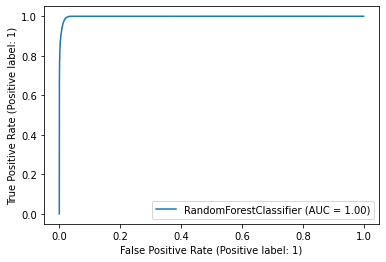

In [162]:
plot_roc_curve(randfor_pca, train_pca_df,y_train)
plt.show()

In [163]:
pred = randfor_pca.predict(train_pca_df)

print("Accuracy : ",metrics.accuracy_score(y_true=y_train, y_pred=pred))
print("Precision : ",precision_score(y_train, pred))
print("Recall Score : ",recall_score(y_train, pred))


Accuracy :  0.9746781192521295
Precision :  0.9889140271493213
Recall Score :  0.7614982578397212


In [164]:
rfc_pca_prediction_test = randfor_pca.predict(test_pca_df)

In [165]:
print("Accuracy : ",metrics.accuracy_score(y_true=y_test, y_pred=rfc_pca_prediction_test))
print("Precision : ",precision_score(y_test, rfc_pca_prediction_test))
print("Recall Score : ",recall_score(y_test, rfc_pca_prediction_test))

Accuracy :  0.9265
Precision :  0.7531380753138075
Recall Score :  0.3879310344827586


# Model Prediction On Test Data

In [168]:
#Convert the date columns to datetime datatype
test["date_of_last_rech_8"] = pd.to_datetime(test['date_of_last_rech_8'])
test["date_of_last_rech_7"] = pd.to_datetime(test['date_of_last_rech_7'])
test["date_of_last_rech_6"] = pd.to_datetime(test['date_of_last_rech_6'])

In [169]:
#Create new features
test['recharge2_days']=(test['date_of_last_rech_8'] - test['date_of_last_rech_7']).dt.days
test['recharge1_days']=(test['date_of_last_rech_7'] - test['date_of_last_rech_6']).dt.days

In [170]:
#Drop the columns which are not required
test.drop(['date_of_last_rech_8','date_of_last_rech_7', 'date_of_last_rech_6'], axis = 1, inplace=True)

In [171]:
test = test[train.columns]

In [172]:
test = test.fillna(0)

In [173]:
#Predict using Random forest
pred = randfor.predict(test)

In [178]:
test_df = pd.read_csv('test (1).csv')

In [179]:
result = pd.DataFrame({"id":test_df.id,"churn_probability":pred})
result.to_csv('Submission.csv', header=True,index=False)

# Conclusion

1. Top predictor model is Random Forest without PCA
2. Accuracy of the Random forest model on train and test data is around 97%